In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lmfit
from lmfit import minimize, Parameters, report_fit
import scipy.stats as stats
import model_accoa as model
import util

sns.set_context('talk')
sns.set_style('ticks')

In [13]:
d1 = pd.read_csv('../data/AcetylCoA_relative_label_ODE_format_6h_wt.csv')
d2 = pd.read_csv('../data/data_relative_KQLATKAAR_ODE_format_6h_wt.csv')

d1.state.replace('nolabel', 'ac12_CoA', inplace=True)
d1.state.replace('label', 'ac13_CoA', inplace=True)
d2.combination.replace('non_ac', 'ac*_ac*', inplace=True)

/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_67500/980132082.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d1.state.replace('nolabel', 'ac12_CoA', inplace=True)
/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_67500/980132082.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [14]:
carrier='DMSO'
cells='TSCctrl'
columns=['ac12_CoA', 'ac13_CoA',
        'ac*_ac*', 'ac*_ac12', 'ac*_ac13']
measured = util.get_measured_data(d1=d1, d2=d2, carrier=carrier, cells=cells)

In [15]:
t_measured = measured[columns].index
x2_measured = measured[columns].values
y0 = measured[columns].iloc[0]
fit_colnames = columns

In [18]:
y0

ac12_CoA    0.983434
ac13_CoA    0.016566
ac*_ac*     0.569471
ac*_ac12    0.413817
ac*_ac13    0.000000
Name: 0.0, dtype: float64

[Text(0.5, 1.0, 'TSCctrl MK'), Text(0, 0.5, 'fraction')]

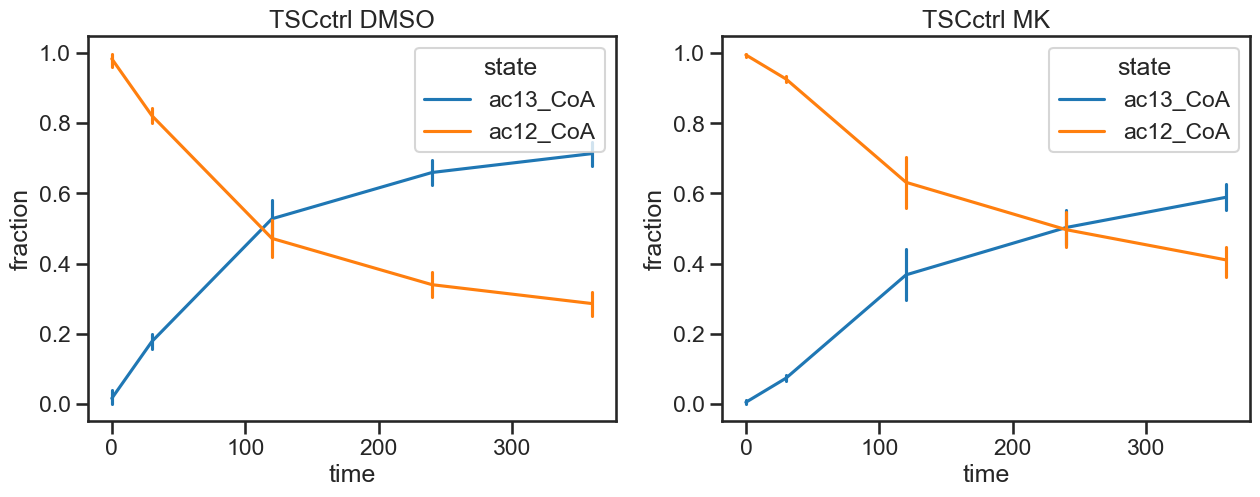

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig1 = sns.lineplot(data=d1[(d1.carrier == 'DMSO') & (d1.cells == 'TSCctrl')],
                    x='time', y='relative_label', hue='state', ax=ax[0], err_style='bars')
fig1.set(title='TSCctrl DMSO', ylabel='fraction')

fig2 = sns.lineplot(data=d1[(d1.carrier == 'MK') & (d1.cells == 'TSCctrl')],
                    x='time', y='relative_label', hue='state', ax=ax[1], err_style='bars')
fig2.set(title='TSCctrl MK', ylabel='fraction')

[Text(0.5, 1.0, 'TSCctrl MK'), Text(0, 0.5, 'fraction')]

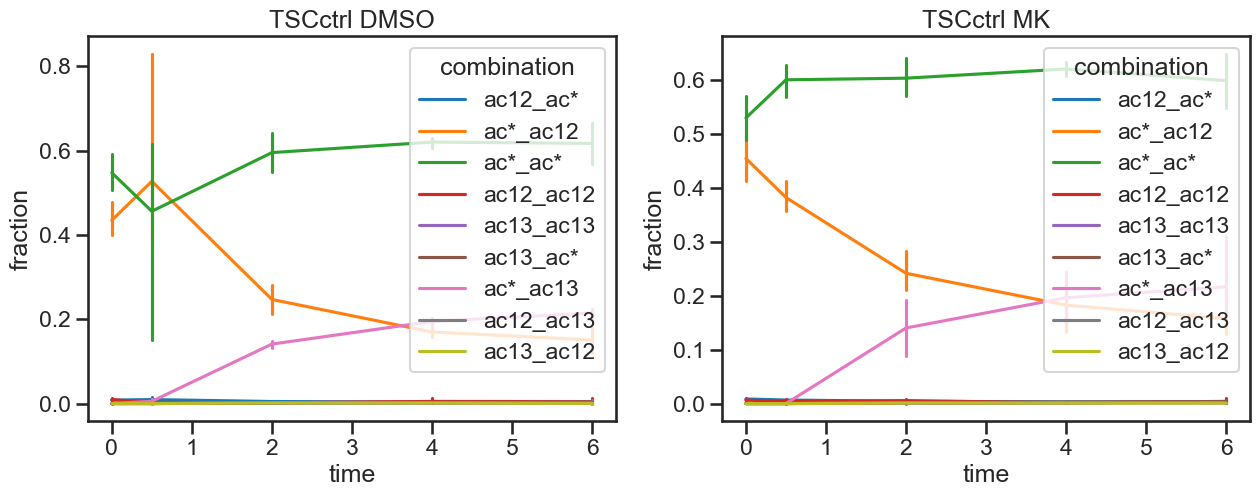

In [9]:
# The line plots connect the mean of the experimental values without fitting
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig1 = sns.lineplot(data=d2[(d2.carrier == 'DMSO') & (d2.cells == 'TSCctrl')],
                    x='time', y='rel_area', hue='combination', ax=ax[0], err_style='bars')
fig1.set(title='TSCctrl DMSO', ylabel='fraction')

fig2 = sns.lineplot(data=d2[(d2.carrier == 'MK') & (d2.cells == 'TSCctrl')],
                    x='time', y='rel_area', hue='combination', ax=ax[1], err_style='bars')
fig2.set(title='TSCctrl MK', ylabel='fraction')

In [10]:
def plot_accoa(measured, df, columns, save, filename=None,
               xcol='time', ycol='relative_label', hue_col='state'):
    measured[ycol] = measured[ycol].map(lambda x: x*100.)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.lineplot(data=df[columns[:2]], dashes=False, ax=ax)
    sns.scatterplot(data=measured, x=xcol, y=ycol, hue=hue_col,
                    hue_order=columns[:2], ax=ax, legend=False)
    ax.set_xlabel('time (hrs)')
    ax.set_ylabel('Relative abundance (%)')
    if save == True and filename != None:
        return fig.savefig(filename, bbox_inches='tight')
    else:
        return plt.show()


def plot_histone(measured, df, columns, save, filename=None,
                 xcol='time', ycol='rel_area', hue_col='combination'):
    measured[ycol] = measured[ycol].map(lambda x: x*100.)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.lineplot(data=df[columns[2:]], dashes=False, ax=ax)
    sns.scatterplot(data=measured, x=xcol, y=ycol, hue=hue_col,
                    hue_order=columns[2:], ax=ax, legend=False)
    ax.set_xlabel('time (hrs)')
    ax.set_ylabel('Relative abundance (%)')
    if save == True and filename != None:
        return fig.savefig(filename, bbox_inches='tight')
    else:
        return plt.show()

## Site specific histone acetylation models

## Uncorrected model (DMSO: 1-site)

In [3]:
# Parameters for the models
params_s1_uncorr = Parameters()
params_s1_uncorr.add('k_a1', value=0.1, min=0.01, max=1000.)
params_s1_uncorr.add('k_d1', value=1, min=0.0001, max=1000.)

In [7]:
np.array([1,2,3]).ravel()


array([1, 2, 3])

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 27
    # data points      = 15
    # variables        = 2
    chi-square         = 0.00491644
    reduced chi-square = 3.7819e-04
    Akaike info crit   = -116.348317
    Bayesian info crit = -114.932216
[[Variables]]
    k_a1:  0.11631413 +/- 0.00825165 (7.09%) (init = 0.1)
    k_d1:  0.24312640 +/- 0.01573942 (6.47%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_a1, k_d1) = +0.6675


/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1967735966.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured[ycol] = measured[ycol].map(lambda x: x*100.)


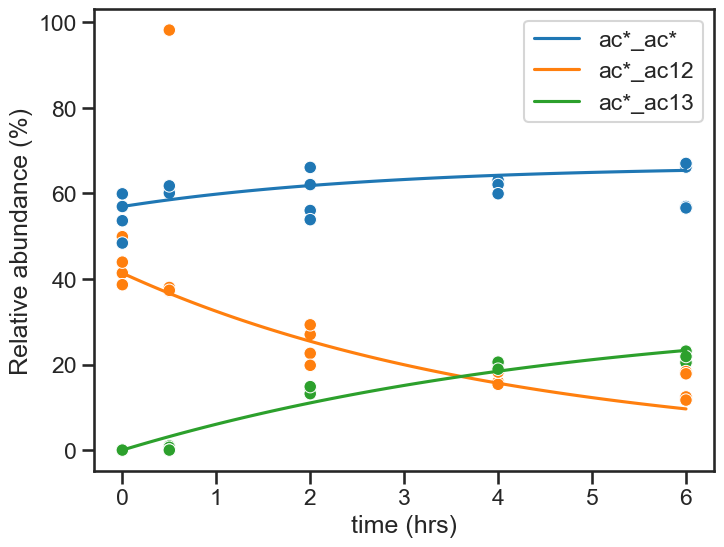

In [12]:
# Parameters for the models
params_s1_uncorr = Parameters()
params_s1_uncorr.add('k_a1', value=0.1, min=0.01, max=1000.)
params_s1_uncorr.add('k_d1', value=1, min=0.0001, max=1000.)

pred, results = util.parameter_estimation(fun_ode_model=model.model_acetylation_1site_uncorr,
                                          residual=util.residual, params=params_s1_uncorr,
                                          d1=d1, d2=d2, method='least_sq', carrier='DMSO',
                                          cells='TSCctrl',
                                          columns=['ac12_CoA', 'ac13_CoA',
                                                   'ac*_ac*', 'ac*_ac12', 'ac*_ac13'],
                                          uncorr=True, display_statistics=False)
pred = pred * 100.

# fit statistics
report_fit(results)

# plot the results
columns = ['ac12_CoA', 'ac13_CoA', 'ac*_ac*', 'ac*_ac12', 'ac*_ac13']
meas = d2[(d2.carrier == 'DMSO') & (d2.cells == 'TSCctrl')
          & d2.combination.isin(columns[2:])]

plot_histone(measured=meas, df=pred, columns=columns, save=False,
             filename='./images/fitted_data_DMSO_uncorrected_histone.svg')

## Corrected model (DMSO: 1-site)

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 60
    # data points      = 25
    # variables        = 5
    chi-square         = 0.00481079
    reduced chi-square = 2.4054e-04
    Akaike info crit   = -203.894268
    Bayesian info crit = -197.799889
[[Variables]]
    k0:    0.16271464 +/- 0.01569836 (9.65%) (init = 0.1)
    k1:    0.43541661 +/- 0.01851284 (4.25%) (init = 0.1)
    k_a1:  0.54748663 +/- 0.08092837 (14.78%) (init = 0.1)
    k_d1:  1.01219846 +/- 0.13999210 (13.83%) (init = 1)
    k_de:  0.59777015 +/- 0.03206954 (5.36%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_a1, k_d1) = +0.9748
    C(k1, k_de)   = +0.9449
    C(k0, k_de)   = +0.9258
    C(k0, k1)     = +0.8760
    C(k1, k_a1)   = -0.2185
    C(k1, k_d1)   = -0.2127
    C(k_d1, k_de) = -0.1681
    C(k_a1, k_de) = -0.1573
    C(k0, k_a1)   = -0.1148
    C(k0, k_d1)   = -0.1067


/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/2186424915.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meas.time = meas.time.map(lambda x: x/60)
/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1967735966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured[ycol] = measured[ycol].map(lambda x: x*100.)


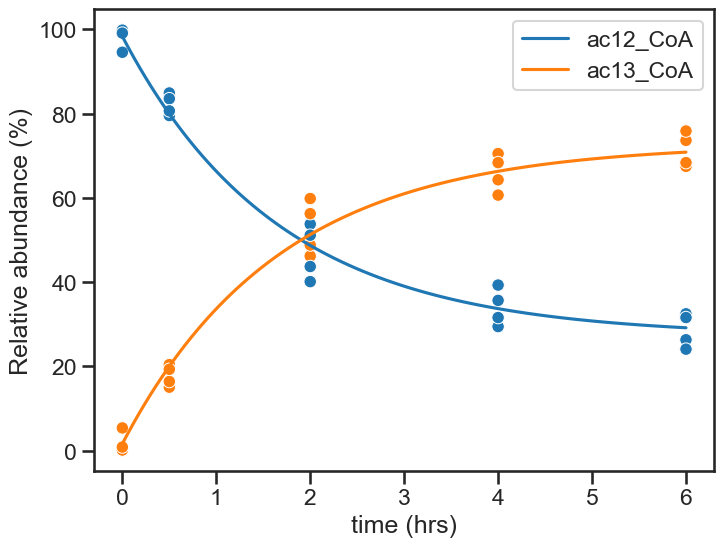

/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1967735966.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured[ycol] = measured[ycol].map(lambda x: x*100.)


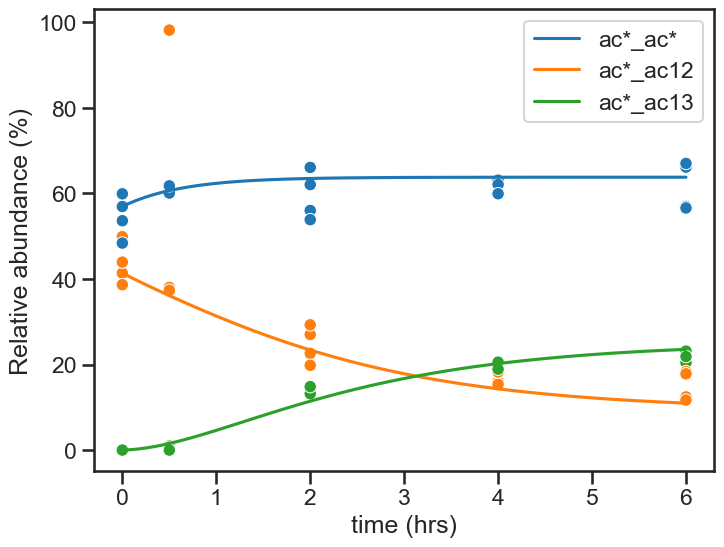

In [13]:
# Parameters for the model
params_s1 = Parameters()
params_s1.add('k0', value=0.1, min=0.0001, max=1000.)
params_s1.add('k1', value=0.1, min=0.0001, max=1000.)
params_s1.add('k_a1', value=0.1, min=0.01, max=1000.)
params_s1.add('k_d1', value=1, min=0.0001, max=1000.)
params_s1.add('k_de', value=0.1, min=0.01, max=1000.)

pred, results = util.parameter_estimation(fun_ode_model=model.model_acetylation_1site,
                                          residual=util.residual, params=params_s1,
                                          d1=d1, d2=d2, method='least_sq', carrier='DMSO', cells='TSCctrl',
                                          columns=['ac12_CoA', 'ac13_CoA',
                                                   'ac*_ac*', 'ac*_ac12', 'ac*_ac13'],
                                          display_statistics=False)

# fit statistics
report_fit(results)

# plot the fitted data
columns = ['ac12_CoA', 'ac13_CoA', 'ac*_ac*', 'ac*_ac12', 'ac*_ac13']
meas = d1[(d1.carrier == 'DMSO') & (d1.cells == 'TSCctrl')
          & d1.state.isin(columns[:2])]
meas.time = meas.time.map(lambda x: x/60)
pred = pred * 100.
plot_accoa(measured=meas, df=pred, columns=columns, save=False,
           filename='./images/fitted_data_DMSO_accoa.svg')

meas = d2[(d2.carrier == 'DMSO') & (d2.cells == 'TSCctrl')
          & d2.combination.isin(columns[2:])]
plot_histone(measured=meas, df=pred, columns=columns, save=False,
             filename='./images/fitted_data_DMSO_histone.svg')

## Uncorrected model (DMSO: 2-sites)

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 92
    # data points      = 25
    # variables        = 4
    chi-square         = 0.00484723
    reduced chi-square = 2.3082e-04
    Akaike info crit   = -205.705581
    Bayesian info crit = -200.830077
[[Variables]]
    k_a1:  0.11624468 +/- 0.00666491 (5.73%) (init = 0.1)
    k_d1:  0.23912480 +/- 0.01271419 (5.32%) (init = 1)
    k_a2:  0.02121913 +/- 2.82442533 (13310.75%) (init = 0.1)
    k_d2:  12.5685394 +/- 1673.88963 (13318.09%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_a2, k_d2) = +0.9990
    C(k_a1, k_d1) = +0.6142
    C(k_a1, k_d2) = -0.2908
    C(k_a1, k_a2) = -0.2907


/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1967735966.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured[ycol] = measured[ycol].map(lambda x: x*100.)


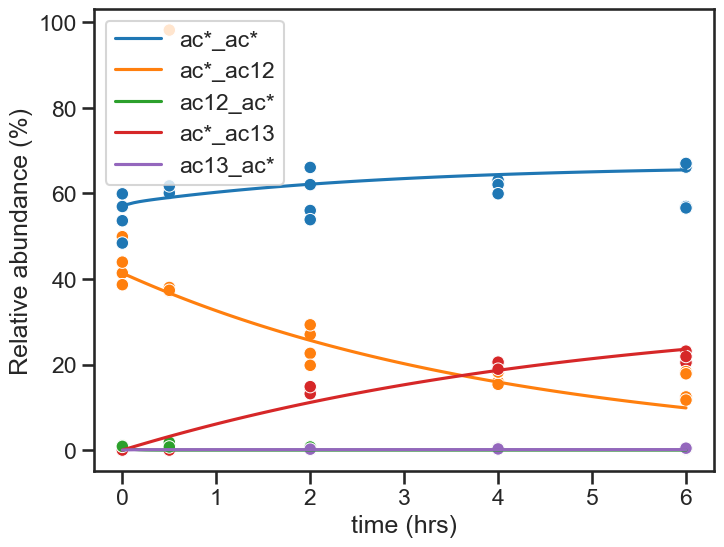

In [14]:
# Parameters for the model
params_s2_uncorr = Parameters()
params_s2_uncorr.add('k_a1', value=0.1, min=0.01, max=1000.)
params_s2_uncorr.add('k_d1', value=1, min=0.0001, max=1000.)
params_s2_uncorr.add('k_a2', value=0.1, min=0.01, max=1000.)
params_s2_uncorr.add('k_d2', value=1, min=0.0001, max=1000.)

pred2, results2 = util.parameter_estimation(fun_ode_model=model.model_acetylation_2sites_uncorr,
                                            residual=util.residual, params=params_s2_uncorr,
                                            d1=d1, d2=d2, method='least_sq', carrier='DMSO', cells='TSCctrl',
                                            columns=['ac12_CoA', 'ac13_CoA', 'ac*_ac*',
                                                     'ac*_ac12', 'ac12_ac*', 'ac*_ac13', 'ac13_ac*'],
                                            uncorr=True, display_statistics=False)
columns = ['ac12_CoA', 'ac13_CoA', 'ac*_ac*',
           'ac*_ac12', 'ac12_ac*', 'ac*_ac13', 'ac13_ac*']
meas = d2[(d2.carrier == 'DMSO') & (d2.cells == 'TSCctrl')
          & d2.combination.isin(columns[2:])]
pred2 = pred2 * 100.
report_fit(results2)
plot_histone(measured=meas, df=pred2, columns=columns, save=False,
             filename='./images/fitted_data_DMSO_uncorrected_histone_2sites.svg')

## Corrected model (DMSO: 2-sites)

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 101
    # data points      = 35
    # variables        = 7
    chi-square         = 0.00481684
    reduced chi-square = 1.7203e-04
    Akaike info crit   = -297.184470
    Bayesian info crit = -286.297033
[[Variables]]
    k0:    0.16274708 +/- 0.01328237 (8.16%) (init = 0.1)
    k1:    0.43544451 +/- 0.01566220 (3.60%) (init = 0.1)
    k_a1:  0.54758813 +/- 0.06838889 (12.49%) (init = 0.1)
    k_d1:  1.01167045 +/- 0.11802666 (11.67%) (init = 1)
    k_a2:  0.04982528 +/- 0.84721144 (1700.36%) (init = 0.1)
    k_d2:  4.57912161 +/- 76.8618471 (1678.53%) (init = 1)
    k_de:  0.59784139 +/- 0.02713536 (4.54%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_a2, k_d2) = +0.9983
    C(k_a1, k_d1) = +0.9707
    C(k1, k_de)   = +0.9449
    C(k0, k_de)   = +0.9259
    C(k0, k1)     = +0.8761
    C(k1, k_a1)   = -0.2175
    C(k1, k_d1)   = -0.2138
    C(k_d1, k_de) = -0.1696
    C(k_a

/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/916904893.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meas.time = meas.time.map(lambda x: x/60)
/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1967735966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured[ycol] = measured[ycol].map(lambda x: x*100.)


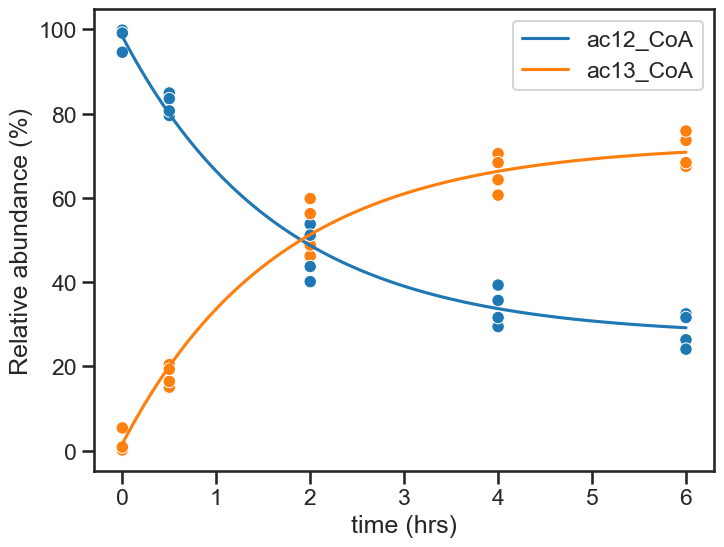

/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1967735966.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured[ycol] = measured[ycol].map(lambda x: x*100.)


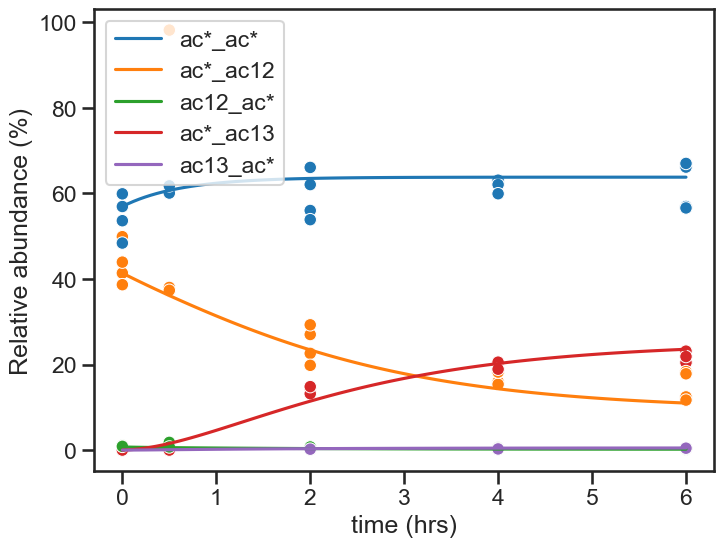

In [15]:
# Parameters for the model
params_s2 = Parameters()
params_s2.add('k0', value=0.1, min=0.0001, max=1000.)
params_s2.add('k1', value=0.1, min=0.0001, max=1000.)
params_s2.add('k_a1', value=0.1, min=0.01, max=1000.)
params_s2.add('k_d1', value=1, min=0.0001, max=1000.)
params_s2.add('k_a2', value=0.1, min=0.01, max=1000.)
params_s2.add('k_d2', value=1, min=0.0001, max=1000.)
params_s2.add('k_de', value=0.1, min=0.01, max=1000.)


pred2, results2 = util.parameter_estimation(fun_ode_model=model.model_acetylation_2sites,
                                            residual=util.residual, params=params_s2,
                                            d1=d1, d2=d2, method='least_sq', carrier='DMSO', cells='TSCctrl',
                                            columns=['ac12_CoA', 'ac13_CoA', 'ac*_ac*',
                                                     'ac*_ac12', 'ac12_ac*', 'ac*_ac13', 'ac13_ac*'],
                                            display_statistics=False)

# fit statistics
report_fit(results2)

# plot the fitted data
columns = ['ac12_CoA', 'ac13_CoA', 'ac*_ac*',
           'ac*_ac12', 'ac12_ac*', 'ac*_ac13', 'ac13_ac*']
meas = d1[(d1.carrier == 'DMSO') & (d1.cells == 'TSCctrl')
          & d1.state.isin(columns[:2])]
meas.time = meas.time.map(lambda x: x/60)
pred2 = pred2 * 100.
plot_accoa(measured=meas, df=pred2, columns=columns, save=False,
           filename='./images/fitted_data_DMSO_accoa_2sites.svg')

meas = d2[(d2.carrier == 'DMSO') & (d2.cells == 'TSCctrl')
          & d2.combination.isin(columns[2:])]
plot_histone(measured=meas, df=pred2, columns=columns, save=False,
             filename='./images/fitted_data_DMSO_histone_2sites.svg')

# Fitting Parameters for TSC ctrl MK

## Uncorrected model (MK: 1-site)

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 24
    # data points      = 15
    # variables        = 2
    chi-square         = 0.00663945
    reduced chi-square = 5.1073e-04
    Akaike info crit   = -111.841655
    Bayesian info crit = -110.425555
[[Variables]]
    k_a1:  0.07477958 +/- 0.00734352 (9.82%) (init = 0.1)
    k_d1:  0.16656496 +/- 0.01303594 (7.83%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_a1, k_d1) = +0.5972


/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1967735966.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured[ycol] = measured[ycol].map(lambda x: x*100.)


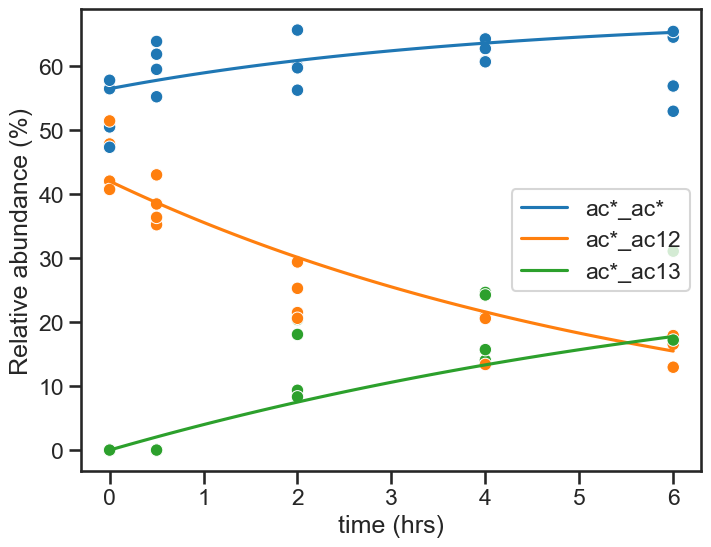

In [16]:
# Parameters for the models
params_s1_uncorr = Parameters()
params_s1_uncorr.add('k_a1', value=0.1, min=0.01, max=1000.)
params_s1_uncorr.add('k_d1', value=1, min=0.0001, max=1000.)

pred, results = util.parameter_estimation(fun_ode_model=model.model_acetylation_1site_uncorr,
                                          residual=util.residual, params=params_s1_uncorr,
                                          d1=d1, d2=d2, display_statistics=False, uncorr=True,
                                          method='least_sq', carrier='MK', cells='TSCctrl',
                                          columns=['ac12_CoA', 'ac13_CoA', 'ac*_ac*', 'ac*_ac12', 'ac*_ac13'])

# fit statistics
report_fit(results)

# plot the fitted data
columns = ['ac12_CoA', 'ac13_CoA', 'ac*_ac*', 'ac*_ac12', 'ac*_ac13']
meas = d2.loc[(d2.carrier == 'MK') & (d2.cells == 'TSCctrl')
              & d2.combination.isin(columns[2:])]
pred = pred * 100.
plot_histone(measured=meas, df=pred, columns=columns, save=False,
             filename='./images/fitted_data_MK_uncorrected_histone.svg')

## Corrected model (MK: 1-site)

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 60
    # data points      = 25
    # variables        = 5
    chi-square         = 0.00912491
    reduced chi-square = 4.5625e-04
    Akaike info crit   = -187.890569
    Bayesian info crit = -181.796190
[[Variables]]
    k0:    0.12358502 +/- 0.02553536 (20.66%) (init = 0.1)
    k1:    0.23966851 +/- 0.01713036 (7.15%) (init = 0.1)
    k_a1:  0.52789436 +/- 0.13675171 (25.91%) (init = 0.1)
    k_d1:  0.96450678 +/- 0.23084743 (23.93%) (init = 1)
    k_de:  0.36281625 +/- 0.04087884 (11.27%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_a1, k_d1) = +0.9847
    C(k0, k_de)   = +0.9730
    C(k1, k_de)   = +0.9371
    C(k0, k1)     = +0.9127
    C(k1, k_a1)   = -0.2245
    C(k1, k_d1)   = -0.2225
    C(k_d1, k_de) = -0.1589
    C(k_a1, k_de) = -0.1492
    C(k0, k_d1)   = -0.1339
    C(k0, k_a1)   = -0.1338


/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/3522366803.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meas.time = meas.time.map(lambda x: x/60)
/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1967735966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured[ycol] = measured[ycol].map(lambda x: x*100.)


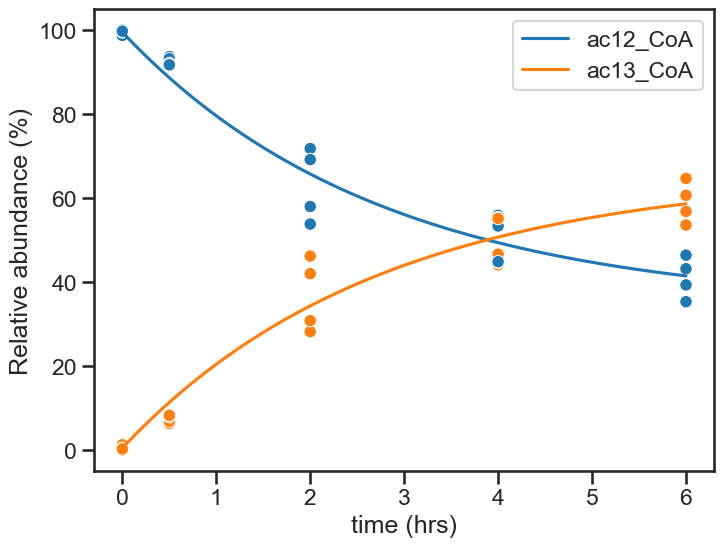

/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1967735966.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured[ycol] = measured[ycol].map(lambda x: x*100.)


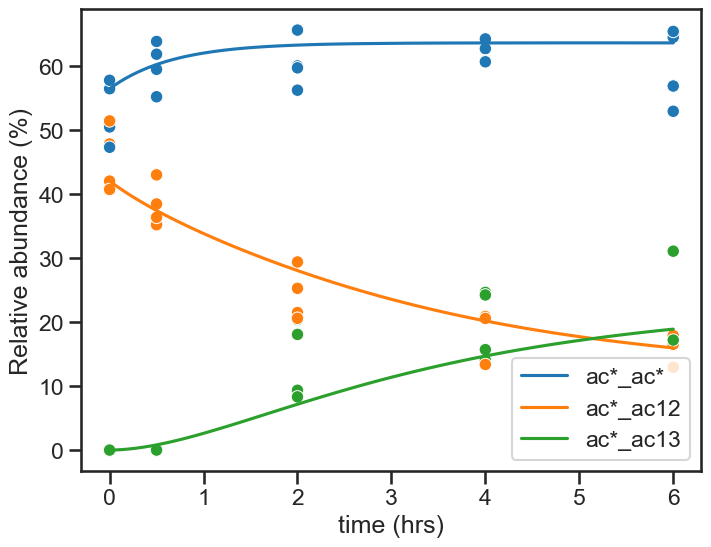

In [17]:
# Parameters for the model
params_s1 = Parameters()
params_s1.add('k0', value=0.1, min=0.0001, max=1000.)
params_s1.add('k1', value=0.1, min=0.0001, max=1000.)
params_s1.add('k_a1', value=0.1, min=0.01, max=1000.)
params_s1.add('k_d1', value=1, min=0.0001, max=1000.)
params_s1.add('k_de', value=0.1, min=0.01, max=1000.)

pred, results = util.parameter_estimation(fun_ode_model=model.model_acetylation_1site,
                                          residual=util.residual, params=params_s1,
                                          d1=d1, d2=d2, display_statistics=False,
                                          method='least_sq', carrier='MK', cells='TSCctrl',
                                          columns=['ac12_CoA', 'ac13_CoA',
                                                   'ac*_ac*', 'ac*_ac12', 'ac*_ac13'])

# fit statistics
report_fit(results)

# plot the fitted data
columns = ['ac12_CoA', 'ac13_CoA', 'ac*_ac*', 'ac*_ac12', 'ac*_ac13']
meas = d1[(d1.carrier == 'MK') & (d1.cells == 'TSCctrl')
          & d1.state.isin(columns[:2])]
meas.time = meas.time.map(lambda x: x/60)
pred = pred * 100.
plot_accoa(measured=meas, df=pred, columns=columns, save=False,
           filename='./images/fitted_data_MK_accoa.svg')

meas = d2[(d2.carrier == 'MK') & (d2.cells == 'TSCctrl')
          & d2.combination.isin(columns[2:])]
plot_histone(measured=meas, df=pred, columns=columns, save=False,
             filename='./images/fitted_data_MK_histone.svg')

## Uncorrected model (MK: 2-sites)

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 109
    # data points      = 25
    # variables        = 4
    chi-square         = 0.00605525
    reduced chi-square = 2.8835e-04
    Akaike info crit   = -200.142653
    Bayesian info crit = -195.267150
[[Variables]]
    k_a1:  0.07515388 +/- 0.00552728 (7.35%) (init = 0.1)
    k_d1:  0.16316161 +/- 0.01018192 (6.24%) (init = 1)
    k_a2:  0.01000117 +/- 2.10414104 (21038.94%) (init = 0.1)
    k_d2:  185.864780 +/- 773.732710 (416.29%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_a1, k_d1) = +0.5217
    C(k_d1, k_a2) = +0.2925
    C(k_a1, k_d2) = +0.1372
    C(k_d1, k_d2) = -0.1099


/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1967735966.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured[ycol] = measured[ycol].map(lambda x: x*100.)


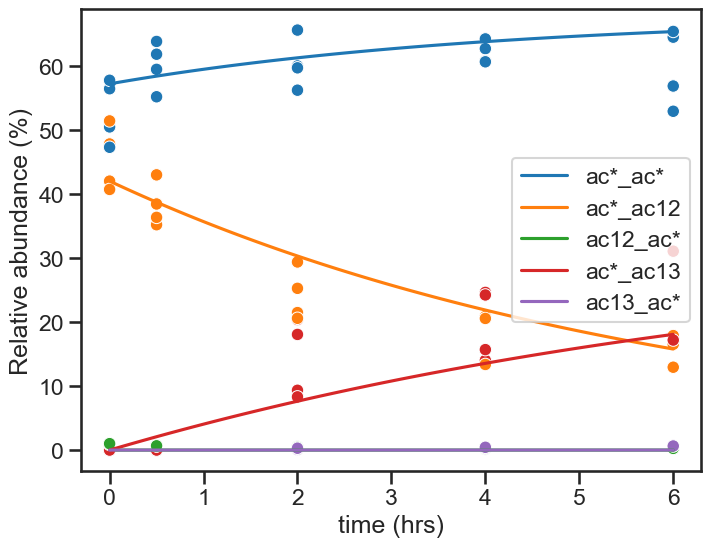

In [18]:
# Parameters for the model
params_s2_uncorr = Parameters()
params_s2_uncorr.add('k_a1', value=0.1, min=0.01, max=1000.)
params_s2_uncorr.add('k_d1', value=1, min=0.0001, max=1000.)
params_s2_uncorr.add('k_a2', value=0.1, min=0.01, max=1000.)
params_s2_uncorr.add('k_d2', value=1, min=0.0001, max=1000.)

pred2, results2 = util.parameter_estimation(fun_ode_model=model.model_acetylation_2sites_uncorr,
                                            residual=util.residual, params=params_s2_uncorr,
                                            d1=d1, d2=d2, display_statistics=False, uncorr=True,
                                            method='least_sq', carrier='MK', cells='TSCctrl',
                                            columns=['ac12_CoA', 'ac13_CoA', 'ac*_ac*',
                                                     'ac*_ac12', 'ac12_ac*', 'ac*_ac13', 'ac13_ac*'])

# fit statistics
report_fit(results2)

# plot the fitted data
columns = ['ac12_CoA', 'ac13_CoA', 'ac*_ac*',
           'ac*_ac12', 'ac12_ac*', 'ac*_ac13', 'ac13_ac*']
meas = d2[(d2.carrier == 'MK') & (d2.cells == 'TSCctrl')
          & d2.combination.isin(columns[2:])]
pred2 = pred2 * 100.
plot_histone(measured=meas, df=pred2, columns=columns, save=False,
             filename='./images/fitted_data_MK_uncorrected_histone_2sites.svg')

## Corrected model (MK: 2-sites)

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 172
    # data points      = 35
    # variables        = 7
    chi-square         = 0.00898914
    reduced chi-square = 3.2104e-04
    Akaike info crit   = -275.348013
    Bayesian info crit = -264.460577
[[Variables]]
    k0:    0.12398517 +/- 0.02143391 (17.29%) (init = 0.1)
    k1:    0.23993075 +/- 0.01439243 (6.00%) (init = 0.1)
    k_a1:  0.53325458 +/- 0.11875336 (22.27%) (init = 0.1)
    k_d1:  0.96575518 +/- 0.19849126 (20.55%) (init = 1)
    k_a2:  0.02745902 +/- 1.23416831 (4494.58%) (init = 0.1)
    k_d2:  8.71024259 +/- 356.904734 (4097.53%) (init = 1)
    k_de:  0.36348885 +/- 0.03433465 (9.45%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_a2, k_d2) = +0.9948
    C(k_a1, k_d1) = +0.9836
    C(k0, k_de)   = +0.9729
    C(k1, k_de)   = +0.9372
    C(k0, k1)     = +0.9126
    C(k1, k_d1)   = -0.2250
    C(k1, k_a1)   = -0.2249
    C(k_d1, k_d2) = +0.1796
    C(k_

/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1086342886.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meas.time = meas.time.map(lambda x: x/60)
/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1967735966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured[ycol] = measured[ycol].map(lambda x: x*100.)


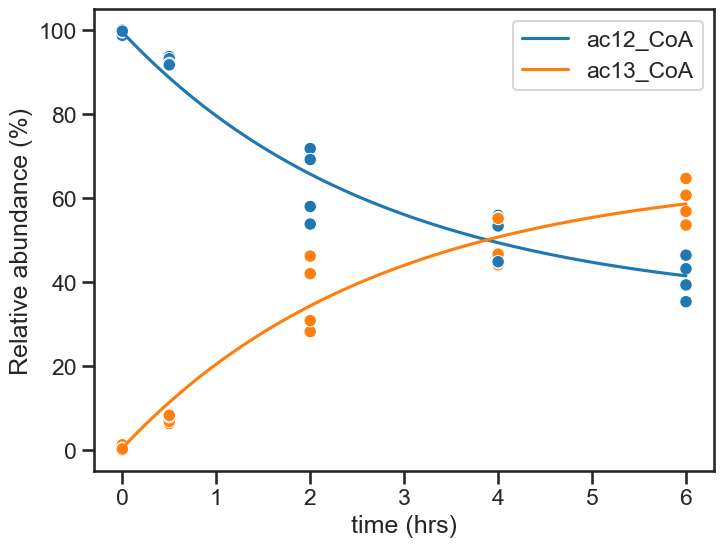

/var/folders/z_/js2pfzts7bqdx1xh6t02msxh0000gn/T/ipykernel_61664/1967735966.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured[ycol] = measured[ycol].map(lambda x: x*100.)


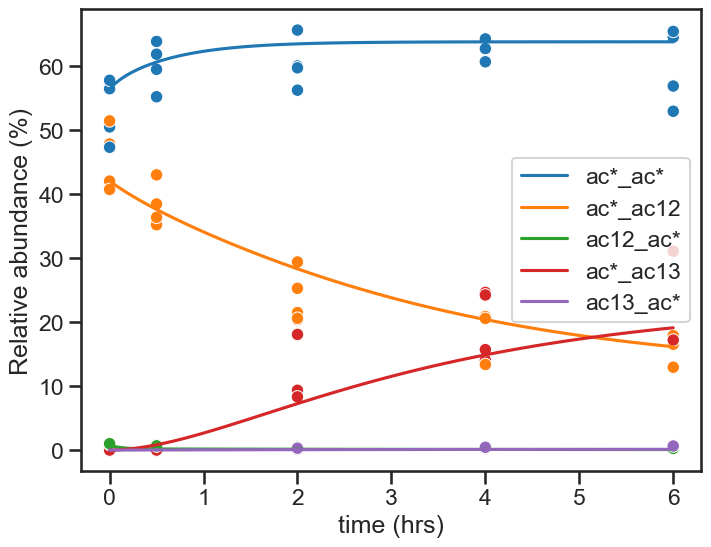

In [19]:
# Parameters for the model
params_s2 = Parameters()
params_s2.add('k0', value=0.1, min=0.0001, max=1000.)
params_s2.add('k1', value=0.1, min=0.0001, max=1000.)
params_s2.add('k_a1', value=0.1, min=0.01, max=1000.)
params_s2.add('k_d1', value=1, min=0.0001, max=1000.)
params_s2.add('k_a2', value=0.1, min=0.01, max=1000.)
params_s2.add('k_d2', value=1, min=0.0001, max=1000.)
params_s2.add('k_de', value=0.1, min=0.01, max=1000.)


pred2, results2 = util.parameter_estimation(fun_ode_model=model.model_acetylation_2sites,
                                            residual=util.residual, params=params_s2,
                                            d1=d1, d2=d2, display_statistics=False,
                                            method='least_sq', carrier='MK', cells='TSCctrl',
                                            columns=['ac12_CoA', 'ac13_CoA', 'ac*_ac*',
                                                     'ac*_ac12', 'ac12_ac*', 'ac*_ac13', 'ac13_ac*'])
pred2 = pred2 * 100.
# fit statistics
report_fit(results2)

# plot the fitted data
columns = ['ac12_CoA', 'ac13_CoA', 'ac*_ac*',
           'ac*_ac12', 'ac12_ac*', 'ac*_ac13', 'ac13_ac*']
meas = d1[(d1.carrier == 'MK') & (d1.cells == 'TSCctrl')
          & d1.state.isin(columns[:2])]
meas.time = meas.time.map(lambda x: x/60)
plot_accoa(measured=meas, df=pred2, columns=columns, save=False,
           filename='./images/fitted_data_MK_accoa_2sites.svg')

meas = d2[(d2.carrier == 'MK') & (d2.cells == 'TSCctrl')
          & d2.combination.isin(columns[2:])]
plot_histone(measured=meas, df=pred2, columns=columns, save=False,
             filename='./images/fitted_data_MK_histone_2sites.svg')